In [2]:
## importing data
from keras.datasets import mnist

In [4]:
# splitting of data
(X_train,y_train),(X_test,y_test)=mnist.load_data()

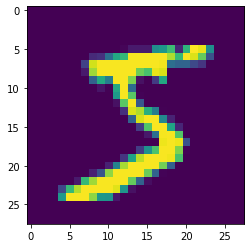

In [11]:
## Checking for data

import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [19]:
X_train[0].shape[1]

28

In [21]:
## Flatten the data
X_train=X_train.reshape(X_train.shape[0],X_train[0].shape[1]**2,1).astype('float32')

In [24]:
X_test=X_test.reshape(X_test.shape[0],X_test[0].shape[1]**2).astype('float32')

In [26]:
##Normalize
X_train=X_train/255
X_test=X_test/255

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils


## One hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [29]:

###building of model

model = Sequential()
model.add(Dense(28*28, input_dim=28*28, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 8s - loss: 1.5316 - accuracy: 0.6636 - val_loss: 37.6416 - val_accuracy: 0.7314
Epoch 2/10
 - 7s - loss: 0.6148 - accuracy: 0.8511 - val_loss: 51.7040 - val_accuracy: 0.7635
Epoch 3/10
 - 6s - loss: 0.4333 - accuracy: 0.8855 - val_loss: 57.4386 - val_accuracy: 0.7749
Epoch 4/10
 - 7s - loss: 0.3688 - accuracy: 0.8979 - val_loss: 56.8143 - val_accuracy: 0.7931
Epoch 5/10
 - 7s - loss: 0.3349 - accuracy: 0.9051 - val_loss: 55.0962 - val_accuracy: 0.8072
Epoch 6/10
 - 7s - loss: 0.3149 - accuracy: 0.9101 - val_loss: 52.0234 - val_accuracy: 0.8197
Epoch 7/10
 - 7s - loss: 0.2996 - accuracy: 0.9140 - val_loss: 47.9084 - val_accuracy: 0.8364
Epoch 8/10
 - 7s - loss: 0.2874 - accuracy: 0.9173 - val_loss: 45.8188 - val_accuracy: 0.8445
Epoch 9/10
 - 6s - loss: 0.2774 - accuracy: 0.9204 - val_loss: 43.9541 - val_accuracy: 0.8534
Epoch 10/10
 - 6s - loss: 0.2679 - accuracy: 0.9231 - val_loss: 40.5088 - val_accuracy: 0.8644


In [35]:
X_test[0].shape

(784,)

In [40]:
y_pred = model.predict_classes(X_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [42]:
print(classification_report(np.argmax(y_test,axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       980
           1       1.00      0.81      0.89      1135
           2       0.91      0.90      0.90      1032
           3       0.89      0.89      0.89      1010
           4       0.96      0.85      0.90       982
           5       1.00      0.55      0.71       892
           6       0.95      0.92      0.94       958
           7       0.98      0.85      0.91      1028
           8       0.53      0.97      0.69       974
           9       0.88      0.89      0.88      1009

    accuracy                           0.86     10000
   macro avg       0.90      0.86      0.87     10000
weighted avg       0.90      0.86      0.87     10000

[[967   0   0   1   0   0   2   1   9   0]
 [  0 921  10   3   0   0   2   1 198   0]
 [ 15   0 924  12   2   0  12   3  60   4]
 [  6   0  18 903   0   1   1   3  75   3]
 [  5   0   6   1 837   0  13   0  58  62]
 [ 26   1   4  57   5 490 

In [43]:
### Using cnn

In [52]:
## Importing data and reshaping

(x_train,y_train),(x_test,y_test)=mnist.load_data()
img_rows=28;
img_cols=28;
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [53]:
## normalize
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train=x_train/255;
x_test=x_test/255

In [54]:
## one hot encoder

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [49]:
## building of model

In [55]:
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [96]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Model=Sequential()
Model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
Model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2,2)))
Model.add(Dropout(0.25))
Model.add(Flatten())
Model.add(Dropout(0.2))
Model.add(Dense(128, activation='relu'))
Model.add(Dropout(0.5))
Model.add(Dense(num_classes, activation='softmax'))



In [97]:
import keras

Model.compile(loss='categorical_crossentropy',optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

In [ ]:
history = Model.fit(x_train, y_train,
          batch_size=200,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
47000/60000 [======================>.......] - ETA: 28s - loss: 0.3758 - accuracy: 0.8821

0

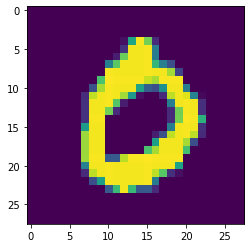

In [95]:
##to do prediction
img=x_test[3]
new=img.reshape(1,28,28,1)
plt.imshow(img)
res=Model.predict(new);
res.argmax()

(1, 10)

7